# Introducción a programación en Cuántica con Qiskit
### Por: Juan David Arcila Moreno
![](img/logos_portada.jpg)

## Índice

- IBM Q Experience: QASM
- Qiskit como un framework de desarrollo
- 'Hello world' en cuántica y otros ejemplos clásicos
- Algoritmo Bernstein-Vazirani
- Elementos de Qiskit
- Cuántica y Machine Learning
- Ejercicios

### [IBM Q Experience](https://quantum-computing.ibm.com/ "IBMQ")
 - **Cuenta con soporte para Notebooks.**
 - **Da acceso a los recursos.**
 - **Muestra el estado de los dispositivos disponibles.**
 - **Historial de trabajos.**
 

## Componentes de Qiskit
![Componentes de Qiskit](img/qiskit_overview.png)

## Quantum Hello World

In [10]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit import Aer

from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [11]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.cx(q[0], q[1])
qc.measure(q, c)

In [12]:
qc.draw()
#qc.draw(output='mpl')
#qc.draw(output='latex') # pip install pylatexenc pillow

┌───┐     ┌─┐   
q0_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q0_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c0_0: 0 ═══════════╩══╬═
                       ║ 
 c0_1: 0 ══════════════╩═

In [13]:
aer_qasm_simulador = Aer.get_backend('qasm_simulator')
job = execute(qc, aer_qasm_simulador, shots=1000)
result = job.result()
count = result.get_counts(qc)
count

{'00': 489, '11': 511}

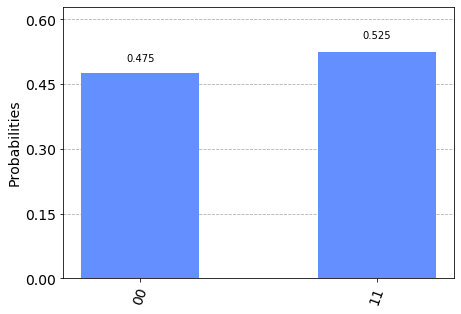

In [7]:
plot_histogram(count)

### Corriendo en un dispositivo real 

**IBMQ** cuenta con diferentes funciones para manejar las cuenta:
- enable_account(TOKEN): Habilita la cuenta en la sesión actual.
- save_account(TOKEN): Guarda una cuenta en disco.
- load_account(): Carga la cuenta guardada en la sesión actual. 
- disable_account(): Disable your account in the current session.
- stored_account(): List the account stored to disk.
- active_account(): List the account currently in the session.
- delete_account(): Delete the saved account from disk.


#### La jerarquia usada en para los servicios de IBMQ es: Hub -> Provider -> Backend
- Diseñado por la comunidad

In [11]:
#IBMQ.save_account('TOKEN')
#IBMQ.stored_account()
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [12]:
provider = IBMQ.get_provider(hub='ibm-q')
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [13]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
#real_device = provider.get_backend(NAME)

## Verifica cual backend tiene menor cola
real_device = least_busy(provider.backends(simulator=False, operational=True))
real_device

<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

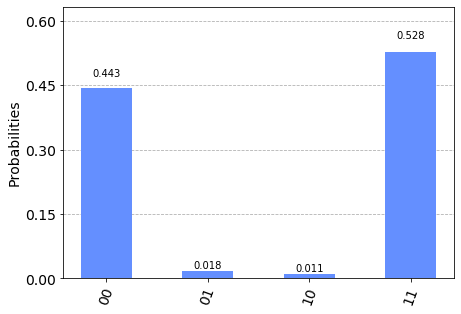

In [16]:
job = execute(qc, real_device, shots=1000)
result = job.result()
count = result.get_counts(qc)
plot_histogram(count)

## Ruido en dispositivos reales

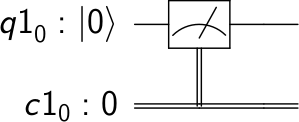

In [12]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
empty_circuit = QuantumCircuit(qr, cr)
empty_circuit.measure(qr,cr)
empty_circuit.draw(output='latex')

In [13]:
job = execute(empty_circuit, aer_qasm_simulador, shots=1024)
result = job.result()
count = result.get_counts(empty_circuit)
print(count)

{'0': 512}


In [18]:
job = execute(empty_circuit, real_device, shots=1024)
result = job.result()
count = result.get_counts(empty_circuit)
print(count)

{'1': 1, '0': 511}


## Generación de números aleatorios

## Version Clásica

In [19]:
import numpy as np
def tirar_moneda(random_values):
 for n in range(5):
    print('Intento -> '+str(n+1))
    if float(random_values[n])<0.5:
        print('CARA', end='\n\n')
    else:
        print('SELLO', end='\n\n')
tirar_moneda(np.random.uniform(size=5))

Intento -> 1
SELLO

Intento -> 2
SELLO

Intento -> 3
SELLO

Intento -> 4
SELLO

Intento -> 5
CARA



## Version Cuántica

In [20]:
# Tenemos 2**n combinaciones
def uniform_distribution_quantum(n):
   q = QuantumRegister(n)
   c = ClassicalRegister(n)
   circ = QuantumCircuit(q, c)
   for j in range(n):
      circ.h(q[j])
    
   circ.measure(q,c)
   return circ

In [21]:
#job = execute(uniform_distribution_quantum(1), provider.get_backend('ibmq_armonk'), shots=5,  memory=True)
job = execute(uniform_distribution_quantum(1), aer_qasm_simulador, shots=5, memory=True)

In [22]:
random_vals = job.result().get_memory()
random_vals

['1', '0', '0', '0', '0']

In [23]:
tirar_moneda(random_vals)

Intento -> 1
SELLO

Intento -> 2
CARA

Intento -> 3
CARA

Intento -> 4
CARA

Intento -> 5
CARA



### Generalizando una distribución

In [24]:
circ = uniform_distribution_quantum(5)
job = execute(circ, aer_qasm_simulador, shots=10000)

In [25]:
## Binary to Int
bit_counts = job.result().get_counts()
int_counts = {}
for bitstring in bit_counts:
    int_counts[ int(bitstring,2) ] = bit_counts[bitstring]

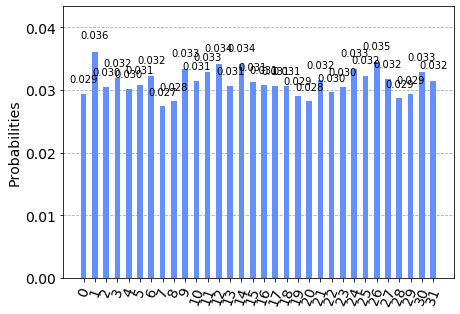

In [26]:
plot_histogram(int_counts)

## Ejercicio: Obtener una distribución normal de una distribución uniforme
### -  **Transformada de Box–Muller**
![](img/normal.png)
#### Link: 

## Algoritmo de Bernstein-Vazirani

In [27]:
key = '101001'
n = len(key)
circuit = QuantumCircuit(n+1,n)

#### **Clave = 101001**

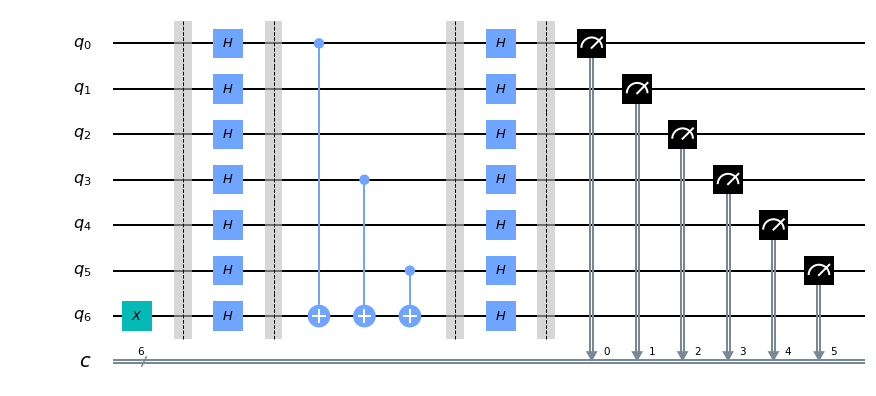

In [28]:
circuit.x(n) # Agregamos un X en el ultimo Qubit (de control)
circuit.barrier()

# Superposición
circuit.h(range(n+1)) # Ponemos H en todos los qubits
circuit.barrier()
# Hacemos el mapeo de las 'AND' a Cuántica
for ii, yesno in enumerate(reversed(key)):
    if yesno == '1': 
        circuit.cx(ii, n)
circuit.barrier()
# Volvemos a aplicar H
circuit.h(range(n+1))
circuit.barrier()
# Medimos todos los qubits menos el ultimo para obtener el mensaje
circuit.measure(range(n), range(n))

circuit.draw(output='mpl')

In [31]:
result = execute(circuit, backend=aer_qasm_simulador, shots=1).result()
result.get_counts(circuit)

{'101001': 1}

### ¡Obtuvimos el resultado en 1 intento!

## Componentes de Qiskit: Terra - Core
![](img/qiskit-terra-logo.svg)

#### Pongamos el siguiente circuito de ejemplo

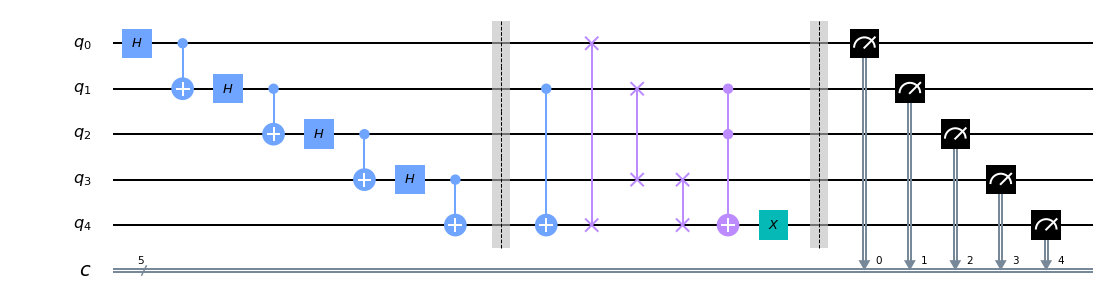

In [32]:
qc = QuantumCircuit(5,5)
for idx in range(4):
    qc.h(idx)
    qc.cx(idx, idx+1)
qc.barrier()
qc.cx(1, 4)
qc.swap(0, 4)
qc.swap(1, 3)
qc.swap(3, 4)
qc.ccx(1,2,4)
qc.x(4)
qc.barrier()
qc.measure(range(5),range(5))
qc.draw(output='mpl')

In [33]:
qc.n_qubits

5

**Width:** tamaño de los registros clásicos y cúanticos

In [34]:
qc.width()

10

**Size:** Numero de operaciones que tiene el circuito

In [35]:
qc.size()

19

**Conteo de operaciones**

In [36]:
qc.count_ops()

OrderedDict([('cx', 5),
             ('measure', 5),
             ('h', 4),
             ('swap', 3),
             ('barrier', 2),
             ('ccx', 1),
             ('x', 1)])

**Depth:** Se obtiene sabiendo la máxima profundidad de un grafo aciclico dirigido (DAG).

In [37]:
qc.depth()

14

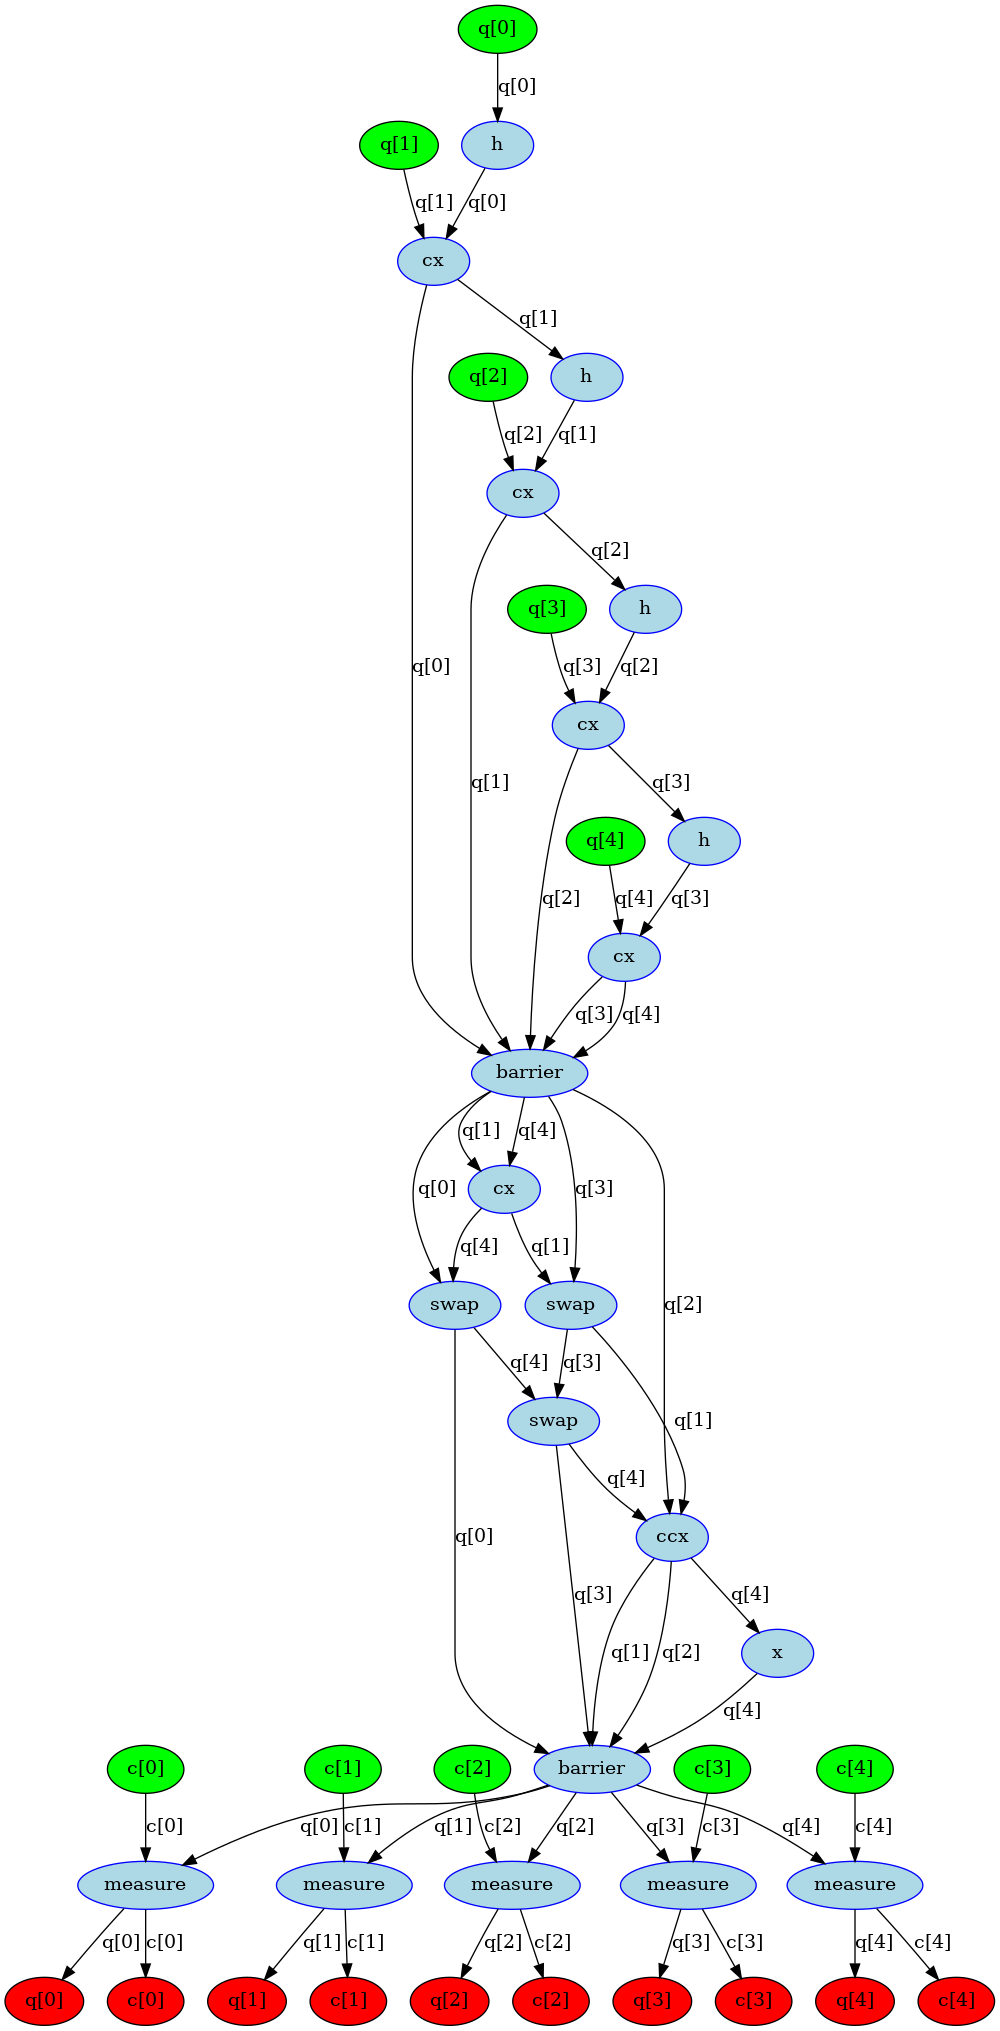

In [38]:
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
dag = circuit_to_dag(qc)
dag_drawer(dag)

## Pasando a puertas básicas

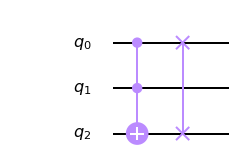

In [39]:
qc2 = QuantumCircuit(3)
qc2.ccx(0, 1, 2)
qc2.swap(0,2)
qc2.draw(output='mpl')

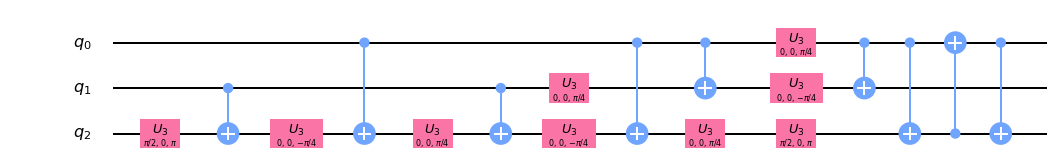

In [40]:
from qiskit.transpiler.passes import Unroller
from qiskit.transpiler import PassManager
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(qc2)
new_circ.draw(output='mpl')

**Verifiquemos el circuito anterior**

In [41]:
nc = pm.run(qc)
print("Circuito Original")
print("%d Qubits con %d width, %d depth\n"%(qc.n_qubits,qc.width(),qc.depth()))
print("Luego del unroll")
print("%d Qubits con %d width, %d depth\n"%(nc.n_qubits,nc.width(),nc.depth()))

Circuito Original
5 Qubits con 10 width, 14 depth

Luego del unroll
5 Qubits con 10 width, 27 depth



## Mapeando a la arquitectura del dispositivo

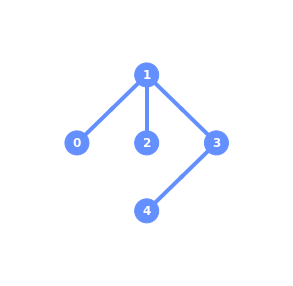

In [42]:
from qiskit import transpile
from qiskit.visualization import plot_gate_map, plot_circuit_layout
backend = provider.get_backend('ibmq_ourense')
plot_gate_map(backend)

In [21]:
lnn5 = backend.configuration().coupling_map
lnn5

In [44]:
lnn5_circ = transpile(nc, backend=None, coupling_map=lnn5)
print("Circuito Original")
print("%d Qubits con %d width, %d depth\n"%(qc.n_qubits,qc.width(),qc.depth()))
print("Luego del unroll")
print("%d Qubits con %d width, %d depth\n"%(nc.n_qubits,nc.width(),nc.depth()))
print("Luego del mapeo al dispositivo")
print("%d Qubits con %d width, %d depth\n"%(lnn5_circ.n_qubits,lnn5_circ.width(),lnn5_circ.depth()))

Circuito Original
5 Qubits con 10 width, 14 depth

Luego del unroll
5 Qubits con 10 width, 27 depth

Luego del mapeo al dispositivo
5 Qubits con 10 width, 44 depth



## Resumen

![](img/resumen.png)

## Integración Backend-API-Terra
![](img/blocks_compile.png)

## Componentes de Qiskit: Aer - Simulación
![](img/qiskit-aer-logo.svg)

## State Vector Simulator

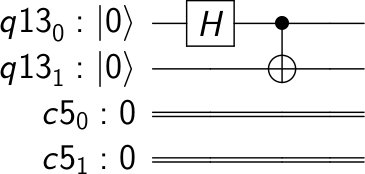

In [34]:
from qiskit.tools.visualization import plot_state_city
state_backend = Aer.get_backend('statevector_simulator')
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
#qc.x(q[0])
qc.h(q[0])
qc.cx(q[0], q[1])
qc.draw(output='latex')

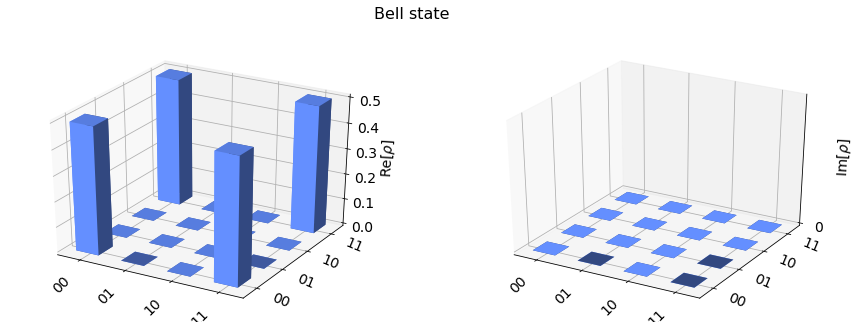

In [35]:
result = execute(qc, state_backend).result()
statevector = result.get_statevector(qc)
plot_state_city(statevector, title='Bell state')

## Añadiendo ruido a la simulación

In [16]:
from qiskit.providers.aer.noise import NoiseModel
device_backend = provider.get_backend('ibmq_ourense')
noise_model = NoiseModel.from_backend(device_backend)
print(noise_model)

NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['measure', 'cx', 'u3', 'u2', 'id']
  Qubits with noise: [0, 1, 2, 3, 4]
  Specific qubit errors: [('id', [0]), ('id', [1]), ('id', [2]), ('id', [3]), ('id', [4]), ('u2', [0]), ('u2', [1]), ('u2', [2]), ('u2', [3]), ('u2', [4]), ('u3', [0]), ('u3', [1]), ('u3', [2]), ('u3', [3]), ('u3', [4]), ('cx', [0, 1]), ('cx', [1, 0]), ('cx', [1, 2]), ('cx', [1, 3]), ('cx', [2, 1]), ('cx', [3, 1]), ('cx', [3, 4]), ('cx', [4, 3]), ('measure', [0]), ('measure', [1]), ('measure', [2]), ('measure', [3]), ('measure', [4])]


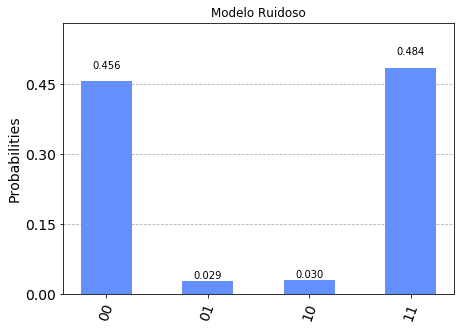

In [24]:
# informacion del backend
basis_gates = noise_model.basis_gates
coupling_map = device_backend.configuration().coupling_map

simulator = Aer.get_backend('qasm_simulator')

# Simulador ruidoso
result_noise = execute(qc, simulator, 
                       noise_model=noise_model,
                       coupling_map=coupling_map,
                       basis_gates=basis_gates).result()
counts_noise = result_noise.get_counts(qc)
plot_histogram(counts_noise, title="Modelo Ruidoso")

## Componentes de Qiskit: Aqua
![](img/qiskit-aqua-logo.svg)

### Variational Quantum Classifier (VQC)
![](img/vqc.png)

In [4]:
from qiskit.ml.datasets import ad_hoc_data
from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import VQC
from qiskit.aqua.components.optimizers import SPSA
from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.aqua.components.variational_forms import RYRZ
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/site-packages/qiskit/ml/datasets/ad_hoc.py:113: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  temp = np.asscalar(np.real(psi.getH()*m_m*psi))
/home/juand/miniconda3/envs/quantum/lib/python3.7/si

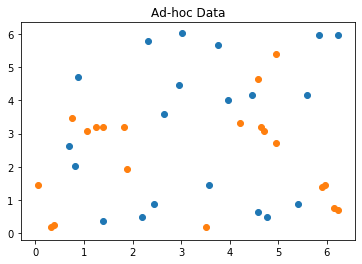

{'A': 0, 'B': 1}


In [5]:
feature_dim = 2 # dimension of each data point
training_dataset_size = 20
testing_dataset_size = 10
random_seed = 10598
shots = 1024

sample_Total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=training_dataset_size, 
    test_size=testing_dataset_size, 
    n=feature_dim, gap=0.3, plot_data=True
)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [6]:

backend = Aer.get_backend('qasm_simulator')

optimizer = SPSA(max_trials=100, c0=4.0, skip_calibration=True)
optimizer.set_options(save_steps=1)
feature_map = SecondOrderExpansion(feature_dimension=feature_dim, depth=2)
var_form = RYRZ(num_qubits=feature_dim, depth=3)
vqc = VQC(optimizer, feature_map, var_form, training_input, test_input)
quantum_instance = QuantumInstance(backend, shots=shots, seed_simulator=random_seed, seed_transpiler=random_seed)

result = vqc.run(quantum_instance)
print("testing success ratio: ", result['testing_accuracy'])

testing success ratio:  1.0


## Referencias
* https://github.com/Qiskit/qiskit-iqx-tutorials
* https://github.com/Qiskit/qiskit-community-tutorials
* API reference: https://qiskit.org/documentation/